In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

In [2]:
user_list = ['Anhad', 'Nishant', 'Tiwari']

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1j5uRzDEkxrvtxtrOgTi70kHre5YW47q5b7Xu1fPEKb8/export?format=csv&gid=111839460', header=None,
            names=['Date', 'Time', 'Home', 'Away', 'Final Score', 'blank', 'Anhad', 'Nishant', 'Tiwari'],
            usecols=['Date', 'Home', 'Away', 'Final Score', 'Anhad', 'Nishant', 'Tiwari'],
            skiprows=[380])

df = df.dropna(subset=['Final Score'])
#df

In [4]:
def points(actual_score, user_score):
    if not pd.notnull(user_score):
        return 0
    
    if actual_score == user_score:
        return 3
    
    ac = [int(x) for x in actual_score.split('-')]
    uc = [int(x) for x in user_score.split('-')]
    
    ac_ = ac[0] - ac[1]
    uc_ = uc[0] - uc[1]
    
    if (ac_  > 0 and uc_ > 0) or (ac_ < 0 and uc_ < 0) or (ac_ == uc_ == 0):
        return 1
    
    return 0

In [5]:
# function that returns points for a match for a given user
def user_points(row, user):
    return points(row['Final Score'], row[user])

def add_points_to_table(df):
    for user in user_list:
        df.insert(len(df.columns), user + ' Points', 'series')

    for user in user_list:
        df[user + ' Points'] = df.apply(user_points, axis=1, args=(user,))

add_points_to_table(df)
df

,Date,Home,Away,Final Score,Anhad,Nishant,Tiwari,Anhad Points,Nishant Points,Tiwari Points
70,"Saturday, 15 October 2016",Arsenal,Swansea,3-2,NaN,2-0,2-0,0,1,1
71,"Saturday, 15 October 2016",Bournemouth,Hull,6-1,NaN,NaN,NaN,0,0,0
72,"Saturday, 15 October 2016",Chelsea,Leicester,3-0,2-0,0-1,2-1,1,0,1
73,"Saturday, 15 October 2016",Crystal Palace,West Ham,0-1,3-1,NaN,2-1,0,0,0
74,"Saturday, 15 October 2016",Man City,Everton,1-1,2-1,3-2,1-0,0,0,0
75,"Saturday, 15 October 2016",Stoke,Sunderland,2-0,NaN,NaN,2-0,0,0,3
76,"Saturday, 15 October 2016",West Brom,Tottenham,1-1,NaN,0-3,1-1,0,0,3
77,"Saturday, 15 October 2016",Middlesbrough,Watford,0-1,0-1,2-2,1-2,3,0,1
78,"Saturday, 15 October 2016",Southampton,Burnley,3-1,0-2,2-1,1-0,0,1,1
79,"Saturday, 15 October 2016",Liverpool,Man Utd,0-0,3-1,1-2,2-0,0,0,0


In [6]:
def score_per_user(df):
    for user in user_list:
        print(user,':', df[user + ' Points'].sum() )

# Calculate the total score
score_per_user(df)

Anhad : 35
Nishant : 30
Tiwari : 35


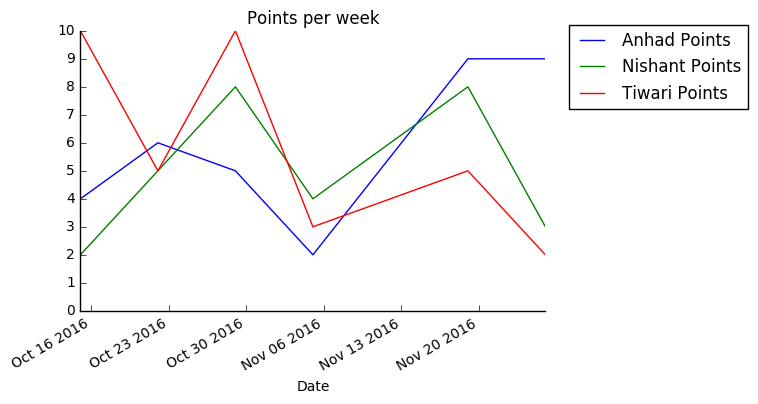

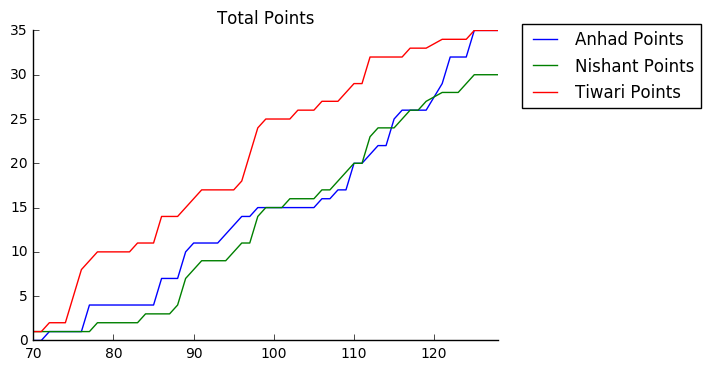

In [16]:
# Graph scores by week

# GroupBy(Date) then sum by points
grouped = df[['Date'] + [u + ' Points' for u in user_list] ].groupby('Date', axis=0)
x = grouped.aggregate(np.sum)

# Convert the 'Date' field to an actual datetime object
x.index = pd.to_datetime(x.index)

# Plot the figure
plt.figure()

# Generate the matplotlib figure object
graph = x.plot()
graph.set_title('Points per week')

# Add some flash
graph.legend(bbox_to_anchor=(1.05,1.02), loc='upper left', borderaxespad=0.)
graph.spines['right'].set_visible(False)
graph.spines['top'].set_visible(False)
graph.tick_params(right='off', top='off')
graph.set_ylim(ymin=0)
loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
graph.yaxis.set_major_locator(loc)

# render
plt.show()

# Cumulative points as well
y = grouped.fillna(0).cumsum()

# Plot the figure
plt.figure()

# Generate the matplotlib figure object
graph = y.plot()
graph.set_title('Total Points')

# Add some flash
graph.legend(bbox_to_anchor=(1.05,1.02), loc='upper left', borderaxespad=0.)
graph.spines['right'].set_visible(False)
graph.spines['top'].set_visible(False)
graph.tick_params(right='off', top='off')
graph.set_ylim(ymin=0)

# render
plt.show()